### 학습목표
- requests 라이브러리 개념에 대해 알고 requests 라이브러리를 활용하여 페이지의 정보를 요청, 응답받자!
- request 라이브러리
  - 서버에게 데이터를 요청하여 응답 받기위한 라이브러리. (브라우저 역할을 대신)
  - 페이지 정보를 요청하고 응답받으면 역할이 끝.

In [1]:
# 라이브러리 불러오기
import requests as req

In [2]:
# 네이버 페이지 정보 받아오기
url = 'https://www.naver.com/'
# 네이버 url을 통하여 페이지 정보 받아오기
res = req.get(url)
# Response [200] : 성공적으로 정보를 잘 입력받았음!
# Response [400] : 클라이언트 pc 의 요청문제가 있을 경우에 출력 결과
# Response [500] : 서버(응답) 에 문제가 있을때 출력 결과
# 오류를 해결할때 큰 도움이 된다! 

In [3]:
# 쿠팡페이지 정보 받아오기!
# url2 = 'https://www.coupang.com/'
# req.get(url2)

In [4]:
# 응답받은 페이지 정보 확인
res.text
# 우리가 웹페이지에서 데이터를 수집하기위해 웹페이지를 구성하는 html 언어를 수집
# 현재 우리가 응답받은 데이터는 문자열 형태의 데이터이다!!
# 컴퓨터가 알아먹을수있는 html 코드로 변경해주는 작업이 필요!

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

### BeautifulSuop 라이브러리
- 컴퓨터가 알아먹을 수 있는 언어로 변경해주는 라이브러리
- 응답받은 문자열 형태의 데이터를 html 형태로 변경해주는 라이브러리

In [5]:
from bs4 import BeautifulSoup as bs

In [6]:
# bs(파싱할 데이터, 파싱방법) -> beautifulsoup 객체화
soup = bs(res.text, 'lxml')

In [7]:
# '날씨' 를 검색한 페이지의 정보를 받아와 bs 객체
url2 = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%A0%EC%94%A8'
res2 = req.get(url2)
res2.text
soup2 = bs(res2.text, 'lxml')

In [8]:
# '블로그' 콘텐츠 추출 -> 태그정보를 통해 데이터를 추출
# 페이지정보를 가진 변수.select('태그정보')
soup2.select('a')
# 페이지에 있는 모든 a 태그를 가져온것! -> 리스트에 담겨서 출력
# 내가 원하는 특정 요소만을 추출하기 위해서 구분자를 활용
# class(.), id(#) 선택자를 사용하자!!!

[<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>,
 <a href="#content"><span>본문 영역으로 바로가기</span></a>,
 <a class="link" href="https://www.naver.com" onclick="return goOtherCR(this, 'a=sta.naver&amp;r=&amp;i=&amp;u='+urlencode(this.href));"><i class="spnew2 ico_logo">NAVER</i></a>,
 <a aria-pressed="false" class="bt_setkr" href="#" id="ke_kbd_btn" onclick="return tCR('a=sch.ime');" role="button"> <i class="spnew2 ico_keyboard">한글 입력기</i> <div class="guide_text">입력도구</div> </a>,
 <a aria-pressed="false" class="bt_atcp _btn_arw" data-atcmp-element="" href="#" id="nautocomplete" role="button"><i class="spnew2 ico_arrow">자동완성 레이어</i><div class="guide_text">검색 레이어</div></a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.blog.all&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*b.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_blog"></i>블로그</a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.cafe.all&amp;sm=tab_j

In [9]:
# 클래스가 tab 인 a태그만을 추출
# select('태그명 구분자기호 구분자이름')
data = soup2.select('a.tab')
data
# '블로그' 만 추출하고 싶다면? -> 인덱싱

[<a aria-selected="false" class="tab" href="?ssc=tab.blog.all&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*b.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_blog"></i>블로그</a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.cafe.all&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*c.jmp&amp;r=2&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_cafe"></i>카페</a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.image.all&amp;where=image&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*i.jmp&amp;r=3&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_image"></i>이미지</a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.kin.kqna&amp;where=kin&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*k.jmp&amp;r=4&amp;i=&amp;u='+urlencode(this.href));" role="tab"><

In [10]:
# '블로그' 를 포함한 요소만 추출
data[0]

<a aria-selected="false" class="tab" href="?ssc=tab.blog.all&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*b.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_blog"></i>블로그</a>

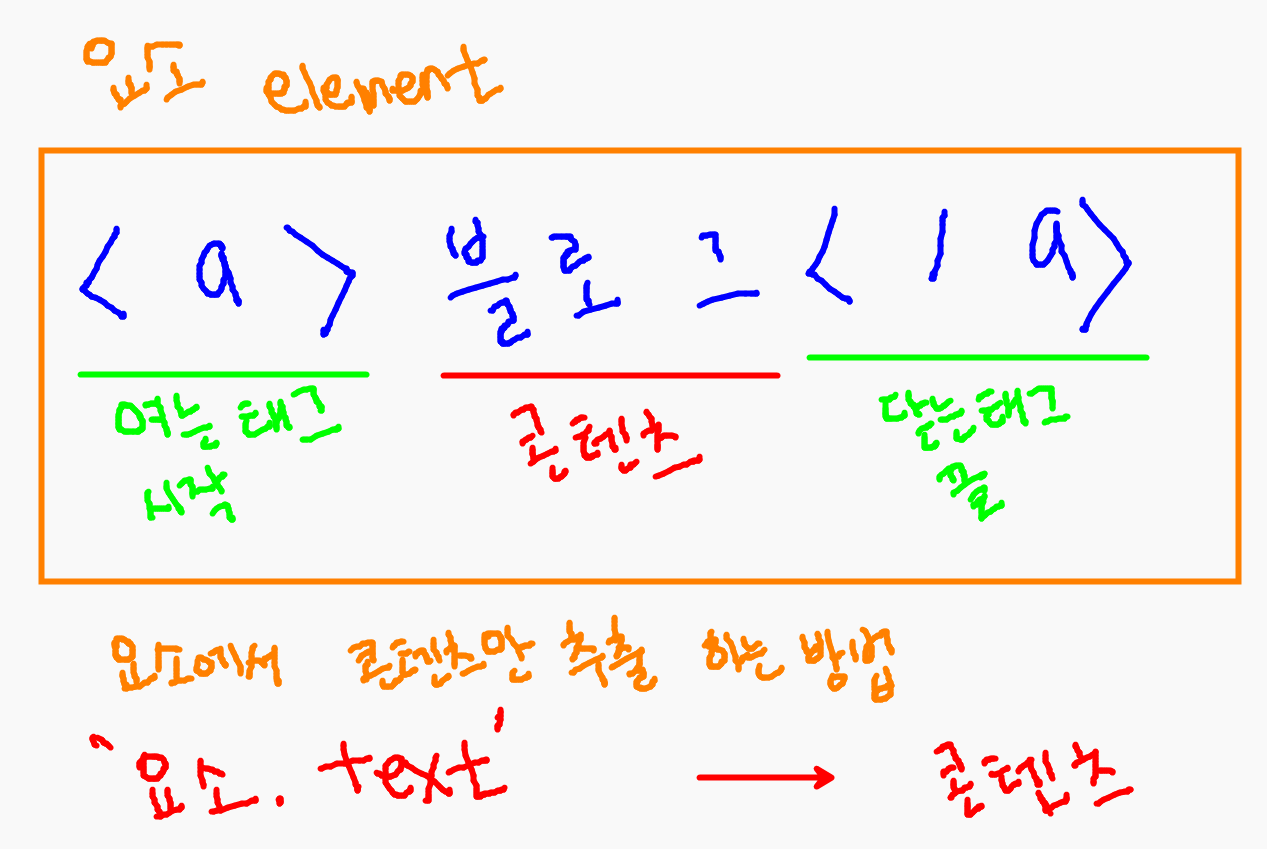

In [11]:
# 요소에서 콘텐츠만을 추출하는 방법
# 요소.text
data[0].text
# 주의!! .text 속성은 반드시 요소!!에 적용가능!!!

'블로그'

In [12]:
len(data)

27

In [13]:
# 전체 탭 출력
for i in range(len(data)):
    print(data[i].text)

블로그
카페
이미지
지식iN
인플루언서
동영상
쇼핑
뉴스
어학사전
지도
도서
지식백과
학술정보
전체
블로그
카페
이미지
지식iN
인플루언서
동영상
쇼핑
뉴스
어학사전
지도
도서
지식백과
학술정보


In [14]:
# 온도정보 가져오기!!!
soup2.select('strong')

[<strong class="tit">정렬</strong>,
 <strong class="tit">기간</strong>,
 <strong class="blind">년(Year)</strong>,
 <strong class="blind">월(Month)</strong>,
 <strong class="blind">일(Day)</strong>,
 <strong class="provider _provider">기상청</strong>,
 <strong class="title">제공</strong>,
 <strong class="blind">제공사</strong>,
 <strong><span class="blind">현재 온도</span>33.8<span class="celsius">°</span></strong>,
 <strong class="title">미세먼지</strong>,
 <strong class="title">초미세먼지</strong>,
 <strong class="title">자외선</strong>,
 <strong class="title">일몰</strong>,
 <strong class="provider _provider">기상청</strong>,
 <strong class="title">제공</strong>,
 <strong class="blind">제공사</strong>,
 <strong><span class="blind">예측 온도</span>26<span class="celsius">°</span></strong>,
 <strong class="title">미세먼지</strong>,
 <strong class="title">초미세먼지</strong>,
 <strong><span class="blind">예측 온도</span>34<span class="celsius">°</span></strong>,
 <strong class="title">미세먼지</strong>,
 <strong class="title">초미세먼지</strong>,
 <str

In [15]:
# 구분자를 통해 다른 태그들과 구분하려 했으나 strong 태그는 구분자를 갖지 않음.
# 부모를 활용하여 다른 태그들과 구분해주는 작업이 필요!!!
# 주의! 반드시 최종목적지까지 정확하게 적어주는 것이 필요!!
soup2.select('div.temperature_text>strong')[0].text

'현재 온도33.8°'

### 실습
- 네이버페이지에서 '가을' 검색한 페이지 정보를 받아와
- 뉴스 제목 수집!!

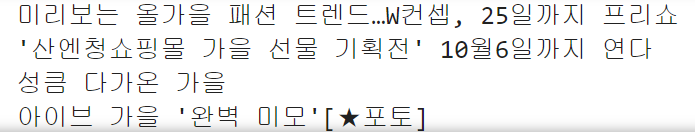


In [16]:
# 주의! 페이지의 정보가 변경되면 반드시 다시 정보를 요청 후 응답받아야한다!
url4 = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&ssc=tab.nx.all&query=%EA%B0%80%EC%9D%84&oquery=%EB%82%A0%EC%94%A8&tqi=irElpdqVOZoss4QIJRKssssssfh-010036'
res4 = req.get(url4)
res4.text
soup4 = bs(res4.text, 'lxml')

In [17]:
# 뉴스 타이틀 추출
soup4.select('a.news_tit')

[<a class="news_tit" href="https://www.yna.co.kr/view/AKR20240812022200030?input=1195m" onclick="return goOtherCR(this, 'a=nws_all*a.tit&amp;r=1&amp;i=880000D8_000000000000000014869896&amp;g=001.0014869896&amp;u='+urlencode(this.href));" target="_blank" title="미리보는 올가을 패션 트렌드…W컨셉, 25일까지 프리쇼">미리보는 올<mark>가을</mark> 패션 트렌드…W컨셉, 25일까지 프리쇼</a>,
 <a class="news_tit" href="https://www.newsis.com/view/NISX20240812_0002846501" onclick="return goOtherCR(this, 'a=nws_all*a.tit&amp;r=4&amp;i=88000127_000000000000000012723341&amp;g=003.0012723341&amp;u='+urlencode(this.href));" target="_blank" title="'산엔청쇼핑몰 가을 선물 기획전' 10월6일까지 연다">'산엔청쇼핑몰 <mark>가을</mark> 선물 기획전' 10월6일까지 연다</a>,
 <a class="news_tit" href="https://www.news1.kr/photos/6820925" onclick="return goOtherCR(this, 'a=nws_all*e.tit&amp;r=7&amp;i=08138263_000000000000000007724930&amp;g=421.0007724930&amp;u='+urlencode(this.href));" target="_blank" title="성큼 다가온 가을">성큼 다가온 <mark>가을</mark></a>,
 <a class="news_tit" href="https://www.starnewskor

In [18]:
# 내가 가져오고싶은 데이터가 첫번째 데이터라면?
soup4.select_one('a.news_tit')
# select 와 select_one 의 차이점은? ✨
# select: 태그정보를 가지는 모든 요소를 추출(리스트에 담아서)
# select_one: 태그정보를 가지는 가장 첫번째 요소만 추출

<a class="news_tit" href="https://www.yna.co.kr/view/AKR20240812022200030?input=1195m" onclick="return goOtherCR(this, 'a=nws_all*a.tit&amp;r=1&amp;i=880000D8_000000000000000014869896&amp;g=001.0014869896&amp;u='+urlencode(this.href));" target="_blank" title="미리보는 올가을 패션 트렌드…W컨셉, 25일까지 프리쇼">미리보는 올<mark>가을</mark> 패션 트렌드…W컨셉, 25일까지 프리쇼</a>

In [19]:
select_elements = soup4.select('a.news_tit')
# i 에는 요소가 담긴다
for i in select_elements:
    print(i.text)

미리보는 올가을 패션 트렌드…W컨셉, 25일까지 프리쇼
'산엔청쇼핑몰 가을 선물 기획전' 10월6일까지 연다
성큼 다가온 가을
아이브 가을 '완벽 미모'[★포토]


In [20]:
# i 에 0부터 숫자가 담긴다
for i in range(len(select_elements)):
    print(select_elements[i].text)

미리보는 올가을 패션 트렌드…W컨셉, 25일까지 프리쇼
'산엔청쇼핑몰 가을 선물 기획전' 10월6일까지 연다
성큼 다가온 가을
아이브 가을 '완벽 미모'[★포토]
